### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()
data.head()
print(data.describe())
data.isnull().sum()


#-------------------------------
#ata.isnull().values.any()
#print(data.describe())
#data.notnull().sum()
#print(data.head())
#print(data.dtypes)
#data.replace("$", "")
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
del data['car']
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [6]:
proportions = data.groupby('Y')['Y'].size() / len(data)
print(proportions)

#---------------------
#groupOfTickets =data.groupby(['Y'])
#groupOfTickets.first()


Y
0    0.431567
1    0.568433
Name: Y, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


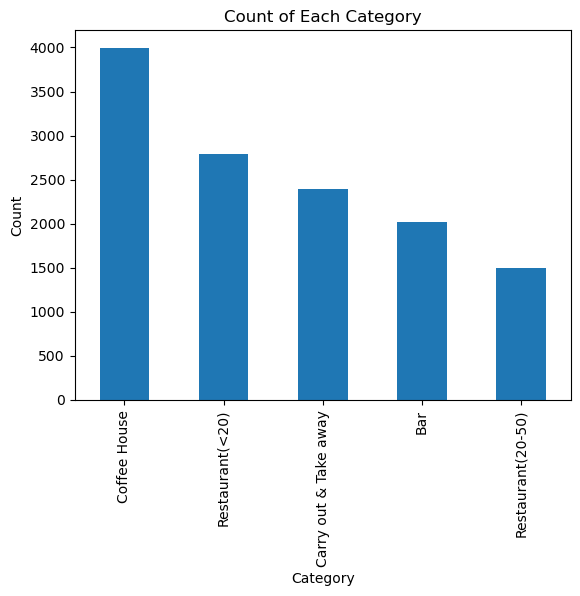

In [7]:
category_counts = data['coupon'].value_counts()
print(category_counts)
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()
#---------------------
#sns.barplot(data = data, x = "coupon", y = "count")
#plt.xticks(rotation = 45)
#fig = px.bar(data, x = "gender", y = "passenger", color = "Cylinder Count",color_discrete_sequence=px.colors.qualitative.G10)
#fig.show()
#px.line(branded_cars, x = "Brand Name", y = "Price in Dollars", color = "Cylinder Count")

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

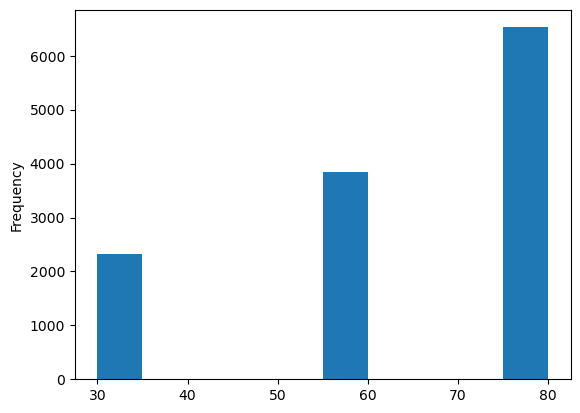

In [8]:
data['temperature'].plot.hist()

#-----------------------
#data_hist = data.hist(bins=100,figsize=(10, 10))
#plt.tight_layout()
#plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


------------ Describe --------------
count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object
------------ Info --------------
<class 'pandas.core.series.Series'>
RangeIndex: 12684 entries, 0 to 12683
Series name: Bar
Non-Null Count  Dtype 
--------------  ----- 
12577 non-null  object
dtypes: object(1)
memory usage: 99.2+ KB


<Axes: >

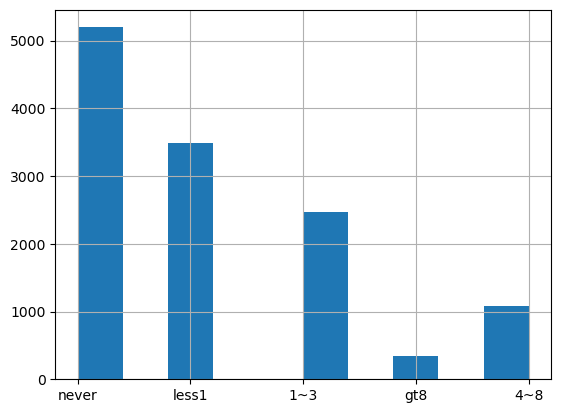

In [9]:
new_dataframe = data['Bar']
print("------------ Describe --------------")
print(new_dataframe.describe())
print("------------ Info --------------")
new_dataframe.info()
new_dataframe.hist()



#-----------------------
#new_dataframe.info()
#new_dataframe.head()
#new_dataframe.hist()

2. What proportion of bar coupons were accepted?


In [10]:
proportions = data.groupby('coupon')['coupon'].size() / len(data)
print(proportions)


coupon
Bar                      0.159019
Carry out & Take away    0.188663
Coffee House             0.315043
Restaurant(20-50)        0.117629
Restaurant(<20)          0.219647
Name: coupon, dtype: float64


In [11]:
filtered_df = data.query("Bar == '1~3'").groupby('Bar')['Y'].count()
group_sizes = data.groupby('coupon')['Bar'].size()
proportions = group_sizes / len(data)
print('-------Printing proportions--------')
print(filtered_df/len(data))
#print(filtered_df)


#---------------------------


#proportions = data.groupby(['coupon','Bar','CoffeeHouse','CarryAway'])['Y'].count()
#proportions = data.groupby(['coupon','Bar'])['Y'].count()
#proportions = data.groupby(['coupon','Bar'])['Y'].size()
#filtered_df_count = data.query("Bar == '1~3'")['Y'].count()
#print(filtered_df)
#proportions = data.groupby('coupon')['Bar'].size()
#print(filtered_df)
#new_dataframe = data['coupon']
#new_dataGroupBy=data.groupby('coupon')
#print(new_dataframe)
#print(new_dataGroupBy)
#bar_frequency_groups = new_dataframe.groupby(pd.cut(data['coupon'], bins=[0, 3, 10]))

-------Printing proportions--------
Bar
1~3    0.19497
Name: Y, dtype: float64


In [12]:
data_frame=data.groupby(['coupon','Bar','Y','age'])['Y'].count()/len(data)
print(data_frame)
#data.query('age>25')
#print(data.query('age>25'))

coupon           Bar    Y  age    
Bar              1~3    0  21         0.003075
                           26         0.002129
                           31         0.001971
                           36         0.001104
                           41         0.000788
                                        ...   
Restaurant(<20)  never  1  36         0.006071
                           41         0.003784
                           46         0.004888
                           50plus     0.010643
                           below21    0.005755
Name: Y, Length: 356, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
filtered_df = data.query("passanger != 'Kid(s)' and occupation!='fishing' and occupation!='forestry' and  occupation != 'farming'").groupby('Bar')['Y'].count()/len(data)
print(filtered_df)

#group_sizes = filtered_df.groupby('coupon')['Bar'].size()
#proportions = group_sizes / len(filtered_df)

#filtered_df=data.groupby(['coupon','Bar','age','passanger','occupation'])['Y'].count()

#group_sizes = filtered_df.groupby('coupon')['Bar'].size()
#filtered_df = data.query("passanger != 'Kid(s)'")
#proportions = filtered_df.groupby('Bar')['Y'].count()


# Print the proportions
#print(proportions)

Bar
1~3      0.182198
4~8      0.082151
gt8      0.027042
less1    0.253311
never    0.368969
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:
filtered_df = data.query("passanger != 'Kid(s)' and maritalStatus!='widowed' and age<'30' and  RestaurantLessThan20 == '4~8'and income in ('$37500 - $49999','$12500 - $24999','25000 - $37499') ").groupby(['Bar','income','RestaurantLessThan20'])['Y'].count()/len(data)
print(filtered_df)
#and income in ('$37500 - $49999')
#or income == '$12500 - $24999'
#or income == '25000 - $37499'
print('-------------------------------------')

Bar    income           RestaurantLessThan20
1~3    $12500 - $24999  4~8                     0.006544
       $37500 - $49999  4~8                     0.002602
4~8    $12500 - $24999  4~8                     0.005203
       $37500 - $49999  4~8                     0.003469
less1  $12500 - $24999  4~8                     0.001734
never  $12500 - $24999  4~8                     0.006938
       $37500 - $49999  4~8                     0.004730
Name: Y, dtype: float64
-------------------------------------


In [25]:
filtered_df1=data.groupby(['coupon','Y','gender','passanger','destination'])['Y'].sum()
print(filtered_df1)

data.corr()

coupon           Y  gender  passanger  destination    
Bar              0  Female  Alone      Home                 0
                                       No Urgent Place      0
                                       Work                 0
                            Friend(s)  No Urgent Place      0
                            Kid(s)     Home                 0
                                                         ... 
Restaurant(<20)  1  Male    Alone      Work               183
                            Friend(s)  No Urgent Place    333
                            Kid(s)     No Urgent Place     73
                            Partner    Home                25
                                       No Urgent Place     76
Name: Y, Length: 148, dtype: int64


ValueError: could not convert string to float: 'No Urgent Place'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
filtered_df1=data.query('Y==1')
filtered_df1=filtered_df1.groupby(['coupon','Y','passanger'])['Y'].sum()
print(filtered_df1)

coupon                 Y  passanger
Bar                    1  Alone         489
                          Friend(s)     188
                          Kid(s)         43
                          Partner       107
Carry out & Take away  1  Alone        1022
                          Friend(s)     560
                          Kid(s)        107
                          Partner        71
Coffee House           1  Alone         988
                          Friend(s)     733
                          Kid(s)        100
                          Partner       174
Restaurant(20-50)      1  Alone         426
                          Friend(s)      78
                          Kid(s)         65
                          Partner        89
Restaurant(<20)        1  Alone         916
                          Friend(s)     662
                          Kid(s)        193
                          Partner       199
Name: Y, dtype: int64


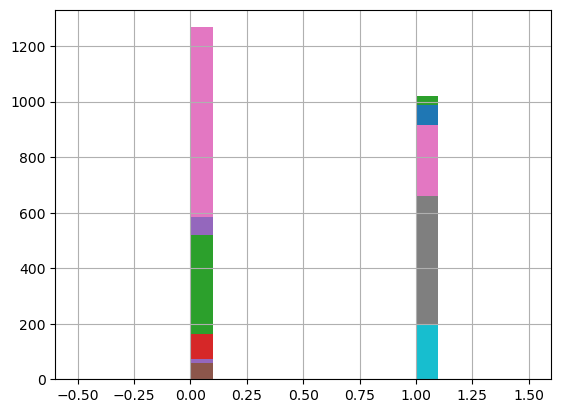

In [24]:
filtered_df1=data.groupby(['coupon','Y','passanger'])['Y'].hist()


In [ ]:
# prompt: what can you hipotize from the dataset (data) above

#This AI generate, it is pretty good

# The data suggests that:

# - Bar coupons were accepted by about 16% of drivers.
# - Drivers who went to a bar less than 3 times a month were more likely to accept the bar coupon than those who went more than 3 times a month.
# - Drivers who were over the age of 25 and went to a bar more than once a month were more likely to accept the bar coupon than those who were under the age of 25 or went to a bar less than once a month.
# - Drivers who went to bars more than once a month and had passengers that were not kids were more likely to accept the bar coupon than those who had kids as passengers.
# - Drivers who went to bars more than once a month and had occupations other than farming, fishing, or forestry were more likely to accept the bar coupon than those who had occupations in those fields.
# - Drivers who went to cheap restaurants more than 4 times a month and had incomes less than $50,000 were more likely to accept the bar coupon than those who went to cheap restaurants less than 4 times a month or had incomes greater than $50,000.

# Based on these observations, we can hypothesize that drivers who accepted the bar coupons were more likely to be:

# - Male
# - Over the age of 25
# - Had passengers that were not kids
# - Had occupations other than farming, fishing, or forestry
# - Went to bars more than once a month
# - Had incomes less than $50,000
# - Went to cheap restaurants more than 4 times a month

# These drivers may have been more likely to accept the bar coupons because they were more likely to be interested in going to bars and because they were more likely to be able to afford to go to bars.